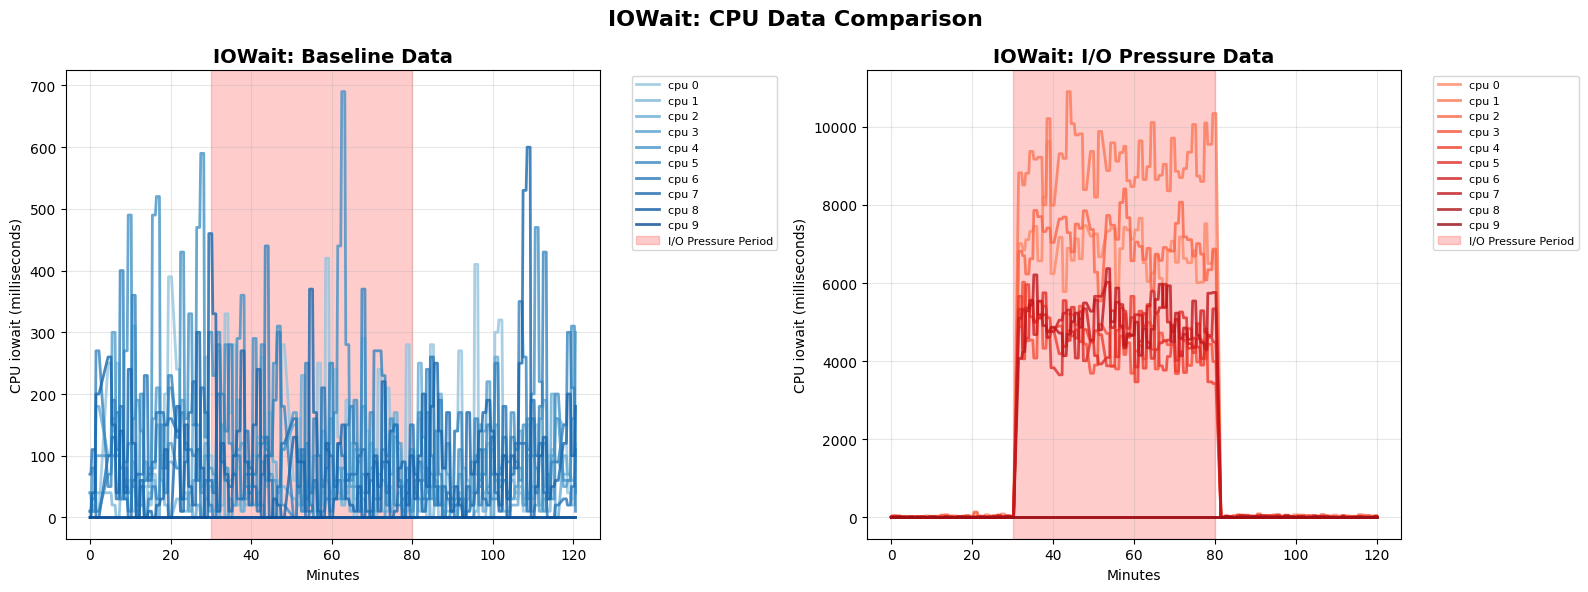

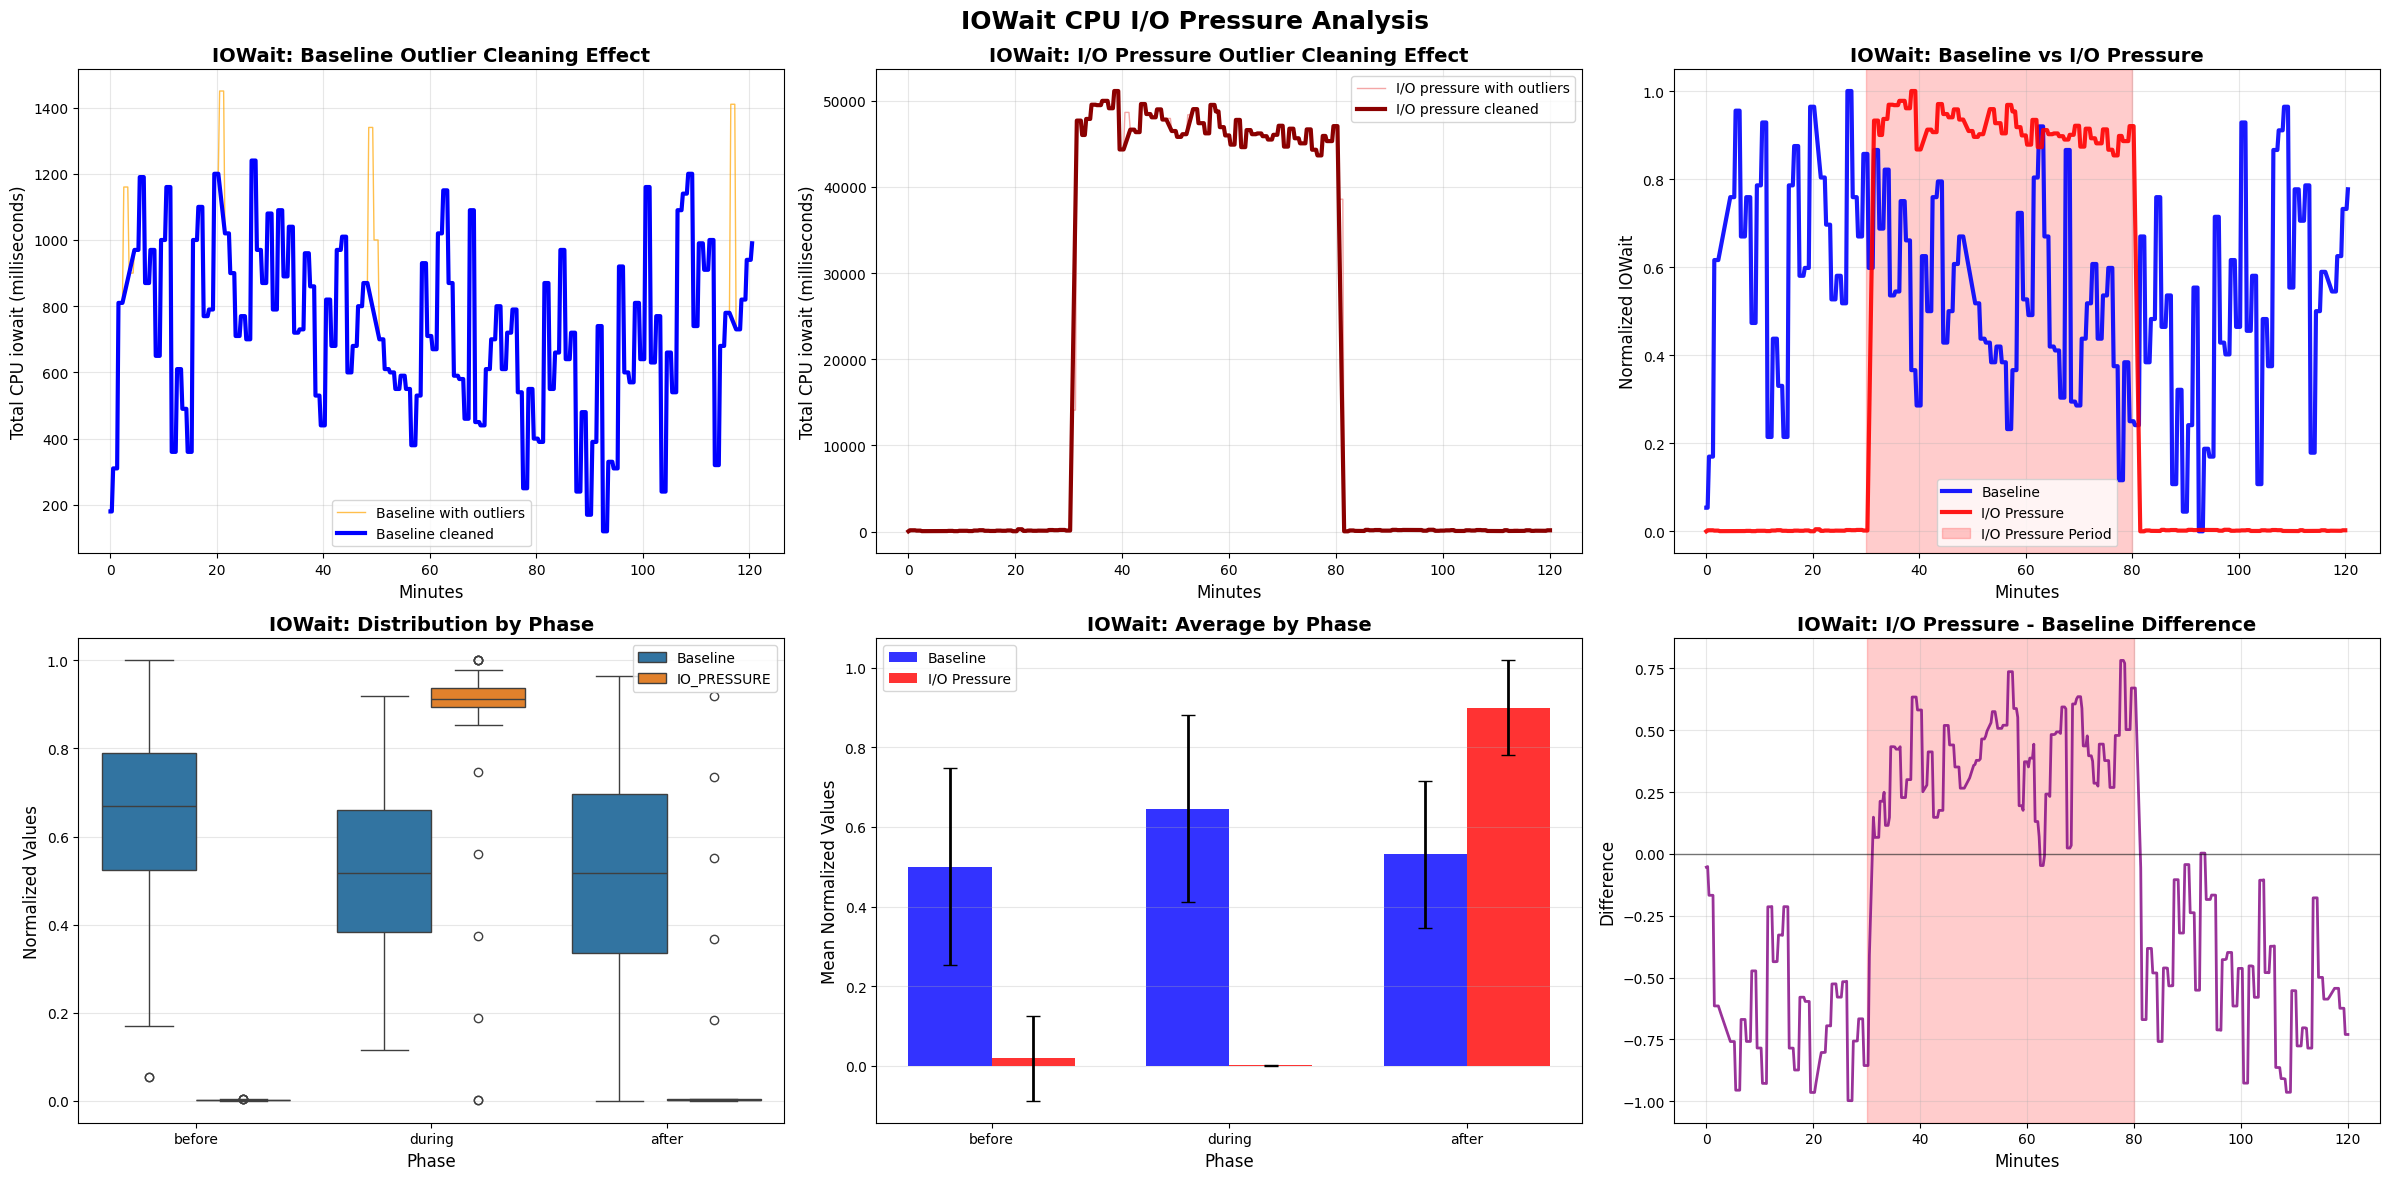


IOWAIT - CPU I/O PRESSURE ANALYSIS RESULTS

BASELINE STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.5005  0.2483  0.0000  0.9643
before  0.6461  0.2346  0.0536  1.0000
during  0.5313  0.1842  0.1161  0.9196

I/O PRESSURE STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.0191  0.1066  0.0000  0.9203
before  0.0015  0.0010  0.0000  0.0047
during  0.8997  0.1186  0.0018  1.0000

STATISTICAL SIGNIFICANCE TESTS:
  BEFORE  : t= 30.10, p=  0.0000 SIGNIFICANT
  DURING  : t=-23.84, p=  0.0000 SIGNIFICANT
  AFTER   : t= 22.56, p=  0.0000 SIGNIFICANT

I/O PRESSURE IMPACT ON CPU:
  BEFORE  :  -99.77% DECREASE
  DURING  :  +69.34% INCREASE
  AFTER   :  -96.19% DECREASE


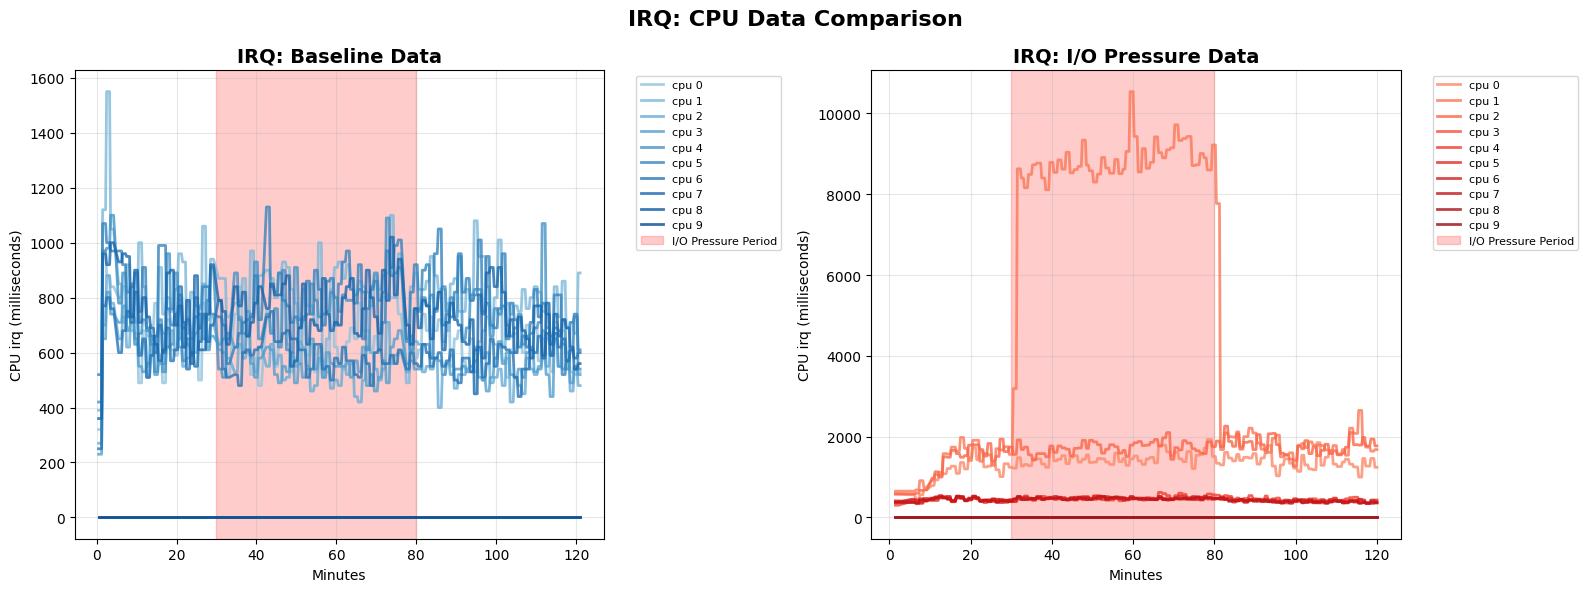

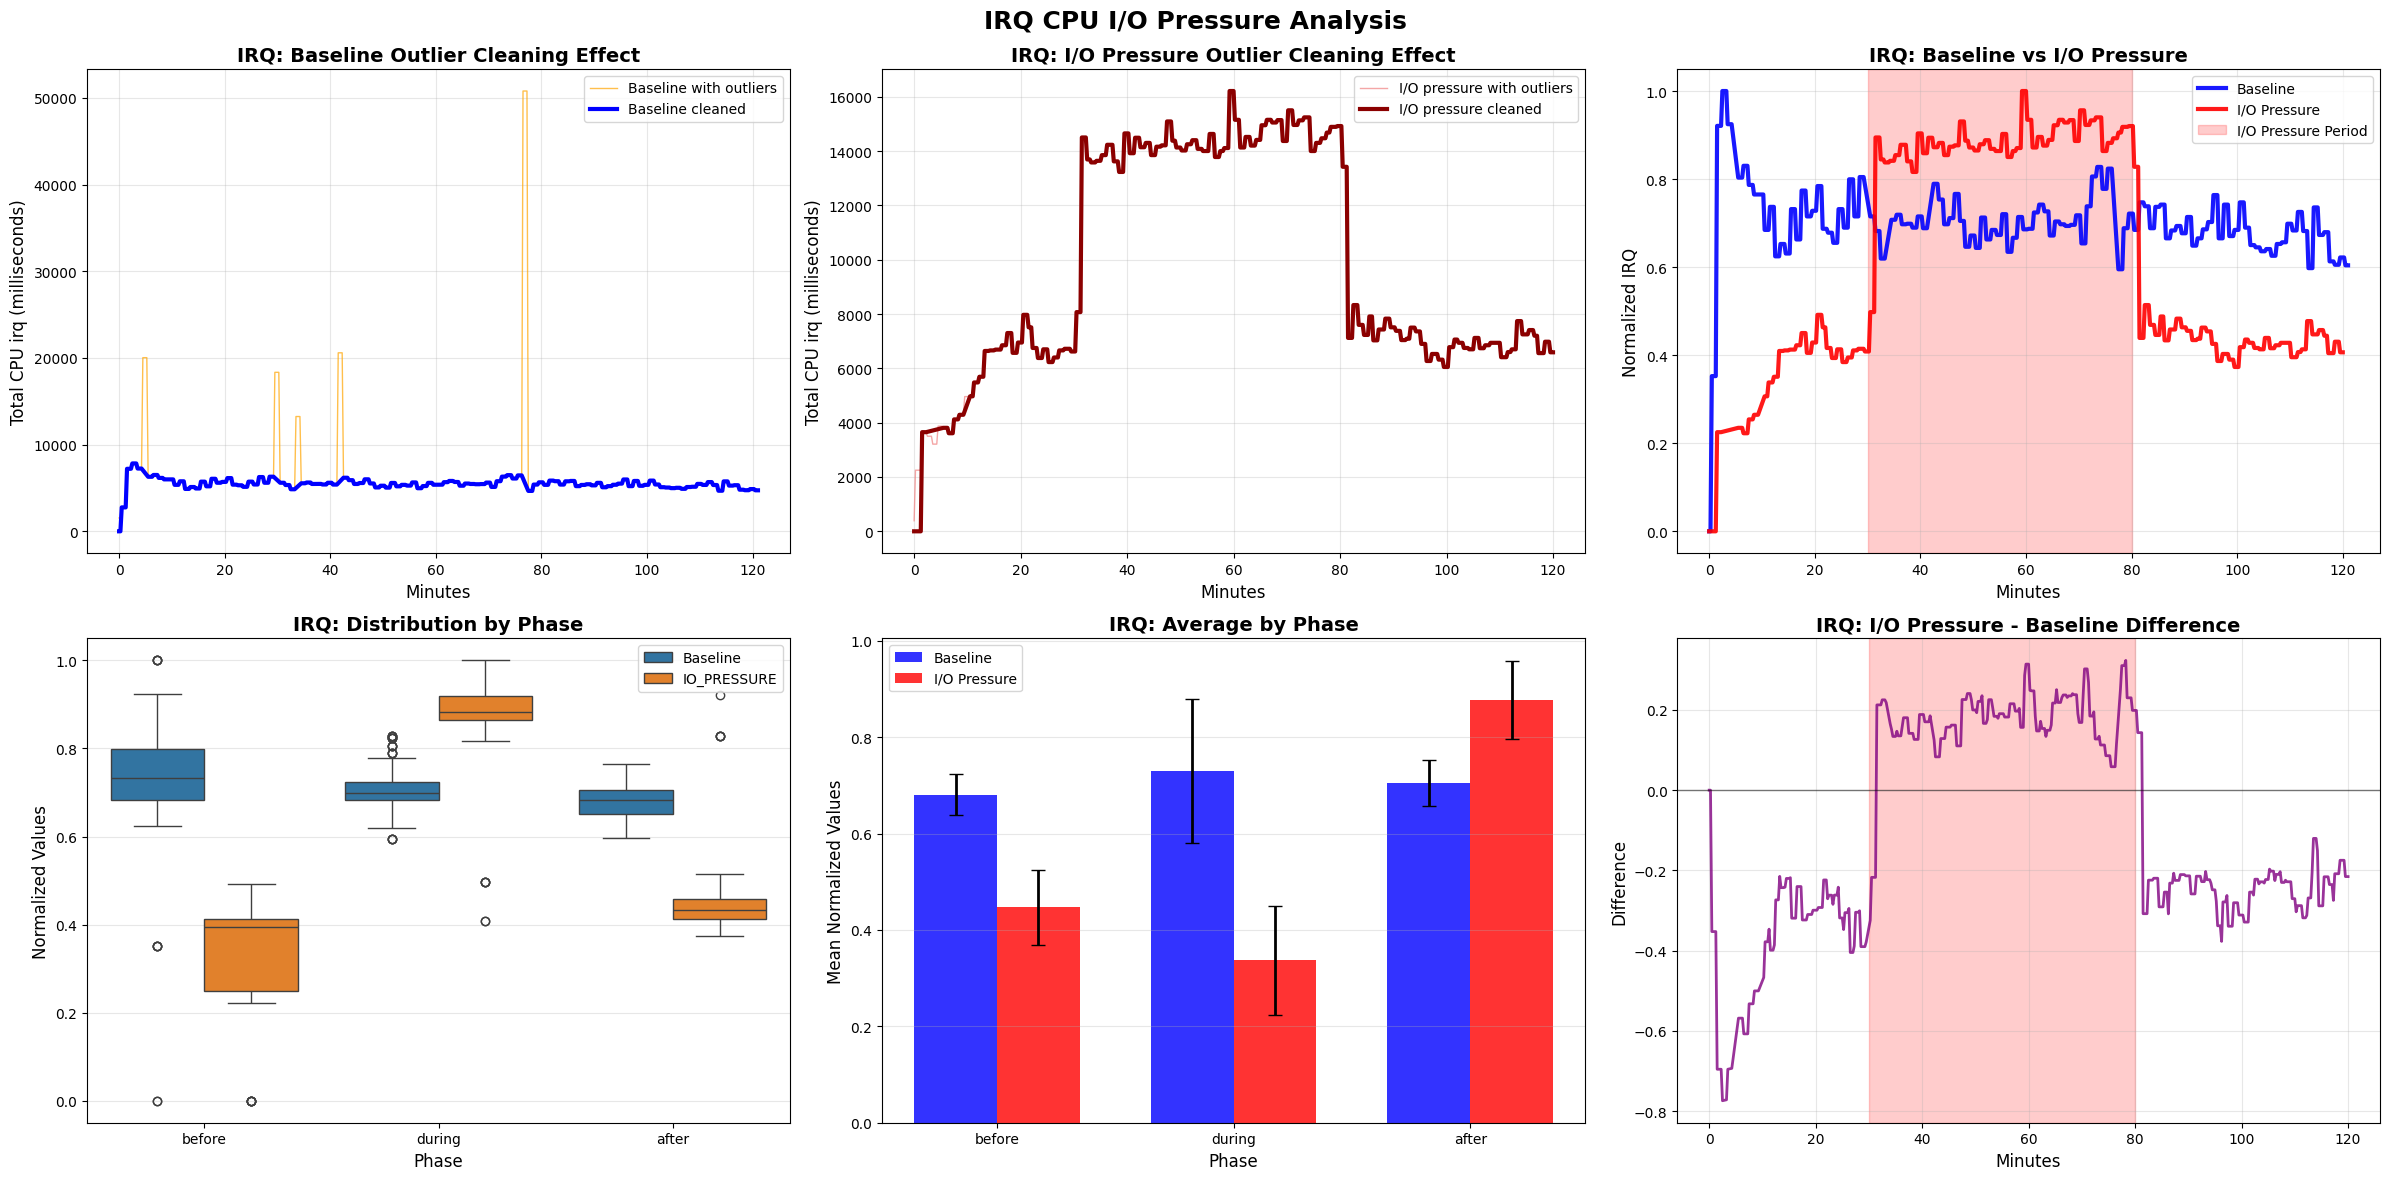


IRQ - CPU I/O PRESSURE ANALYSIS RESULTS

BASELINE STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.6803  0.0427  0.5977  0.7637
before  0.7296  0.1487  0.0000  1.0000
during  0.7058  0.0475  0.5951  0.8276

I/O PRESSURE STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.4469  0.0779  0.3732  0.9204
before  0.3372  0.1130  0.0000  0.4917
during  0.8770  0.0802  0.4084  1.0000

STATISTICAL SIGNIFICANCE TESTS:
  BEFORE  : t= 23.01, p=  0.0000 SIGNIFICANT
  DURING  : t=-26.04, p=  0.0000 SIGNIFICANT
  AFTER   : t= 33.54, p=  0.0000 SIGNIFICANT

I/O PRESSURE IMPACT ON CPU:
  BEFORE  :  -53.79% DECREASE
  DURING  :  +24.26% INCREASE
  AFTER   :  -34.31% DECREASE


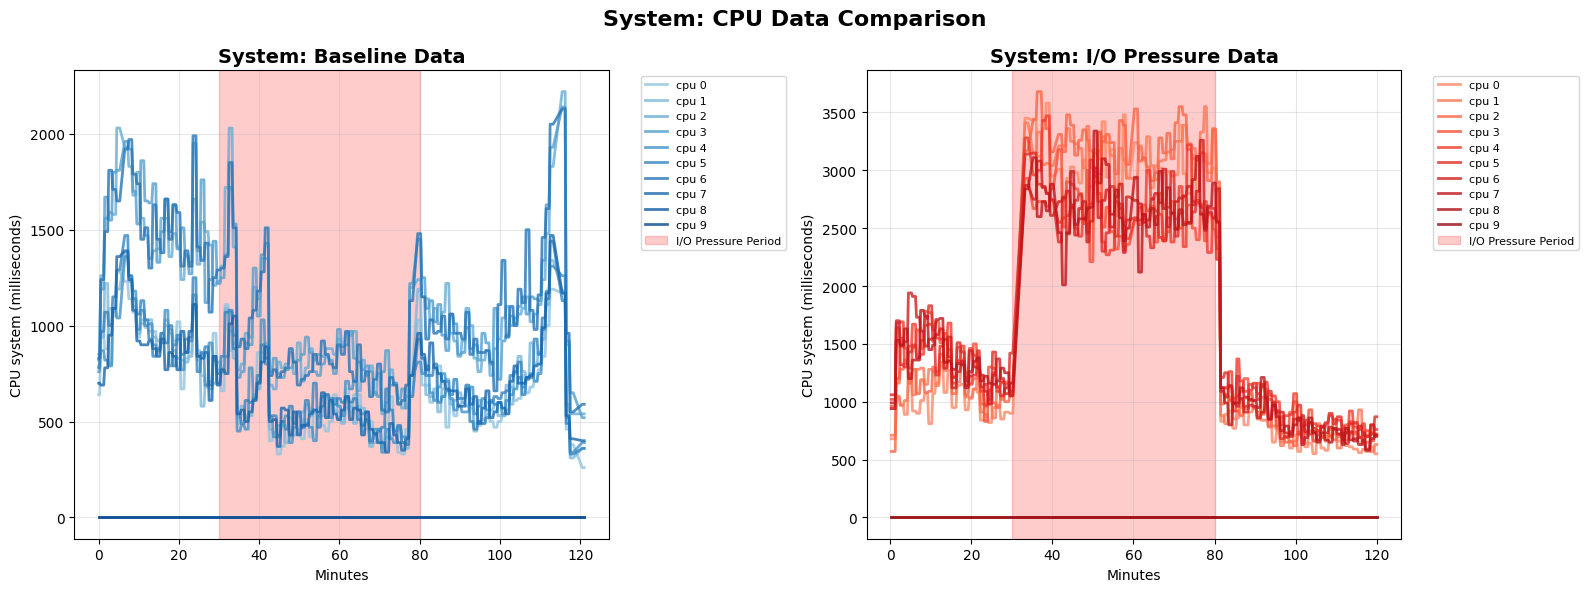

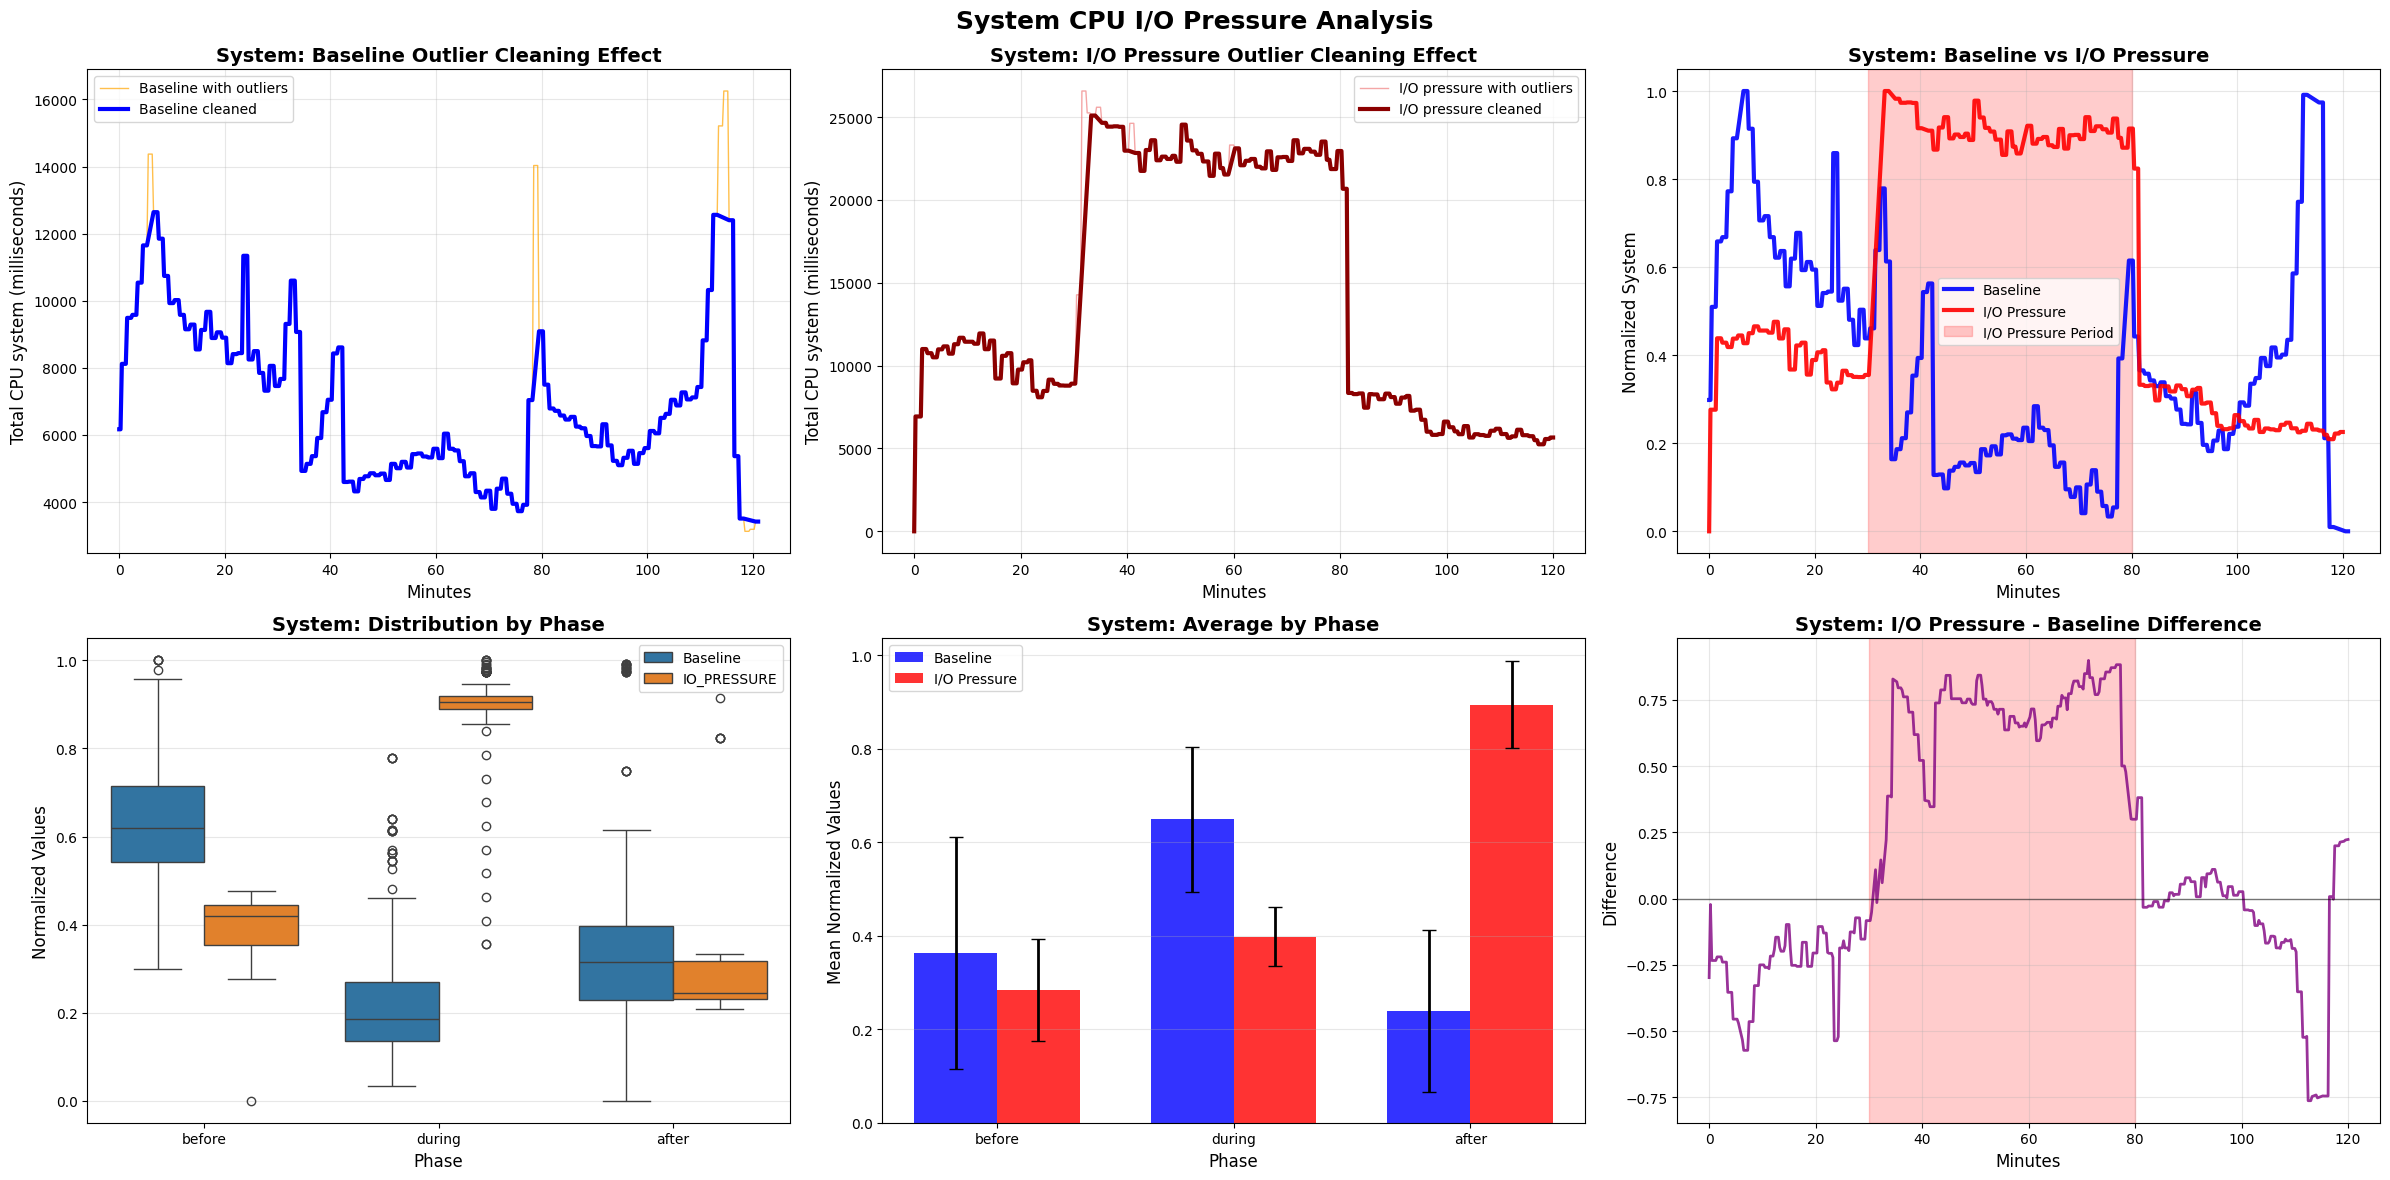


SYSTEM - CPU I/O PRESSURE ANALYSIS RESULTS

BASELINE STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.3633  0.2484  0.0000  0.9913
before  0.6488  0.1556  0.2983  1.0000
during  0.2399  0.1734  0.0336  0.7787

I/O PRESSURE STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.2829  0.1091  0.2092  0.9147
before  0.3977  0.0634  0.0000  0.4759
during  0.8941  0.0927  0.3551  1.0000

STATISTICAL SIGNIFICANCE TESTS:
  BEFORE  : t= 16.37, p=  0.0000 SIGNIFICANT
  DURING  : t=-47.17, p=  0.0000 SIGNIFICANT
  AFTER   : t=  3.76, p=  0.0002 SIGNIFICANT

I/O PRESSURE IMPACT ON CPU:
  BEFORE  :  -38.70% DECREASE
  DURING  : +272.77% INCREASE
  AFTER   :  -22.12% DECREASE


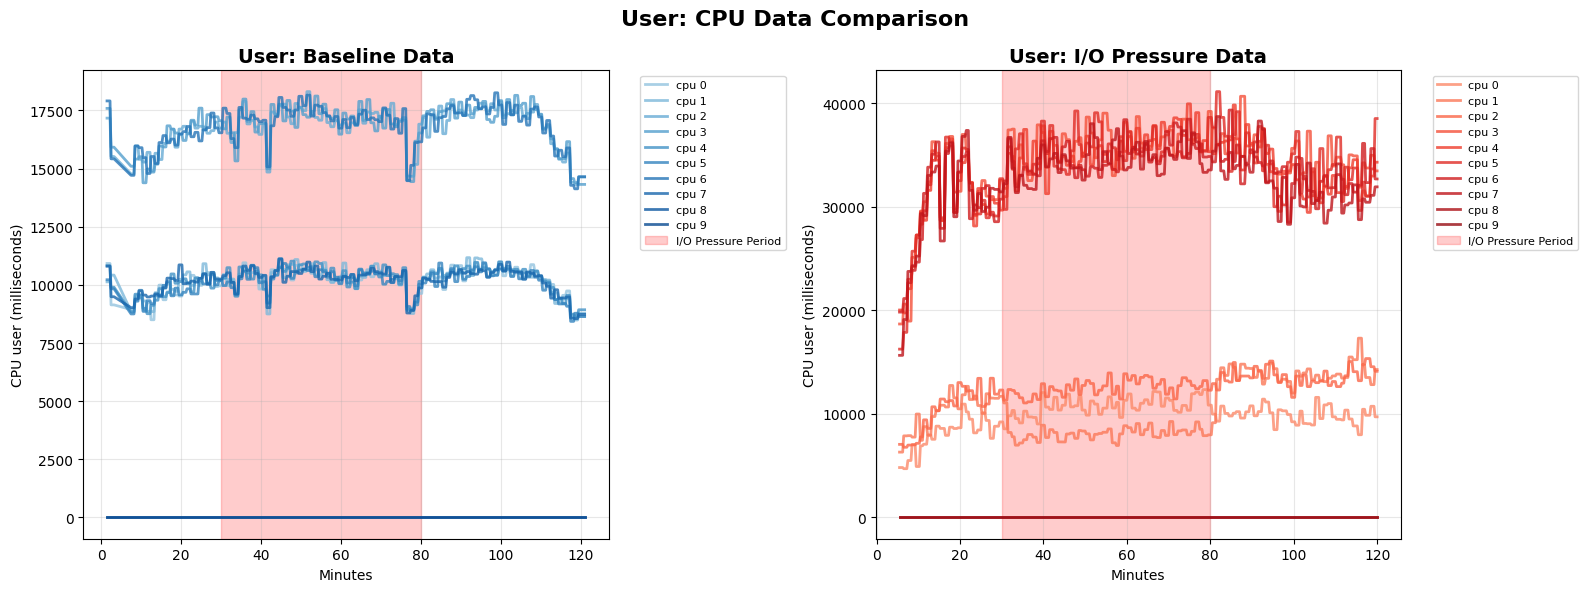

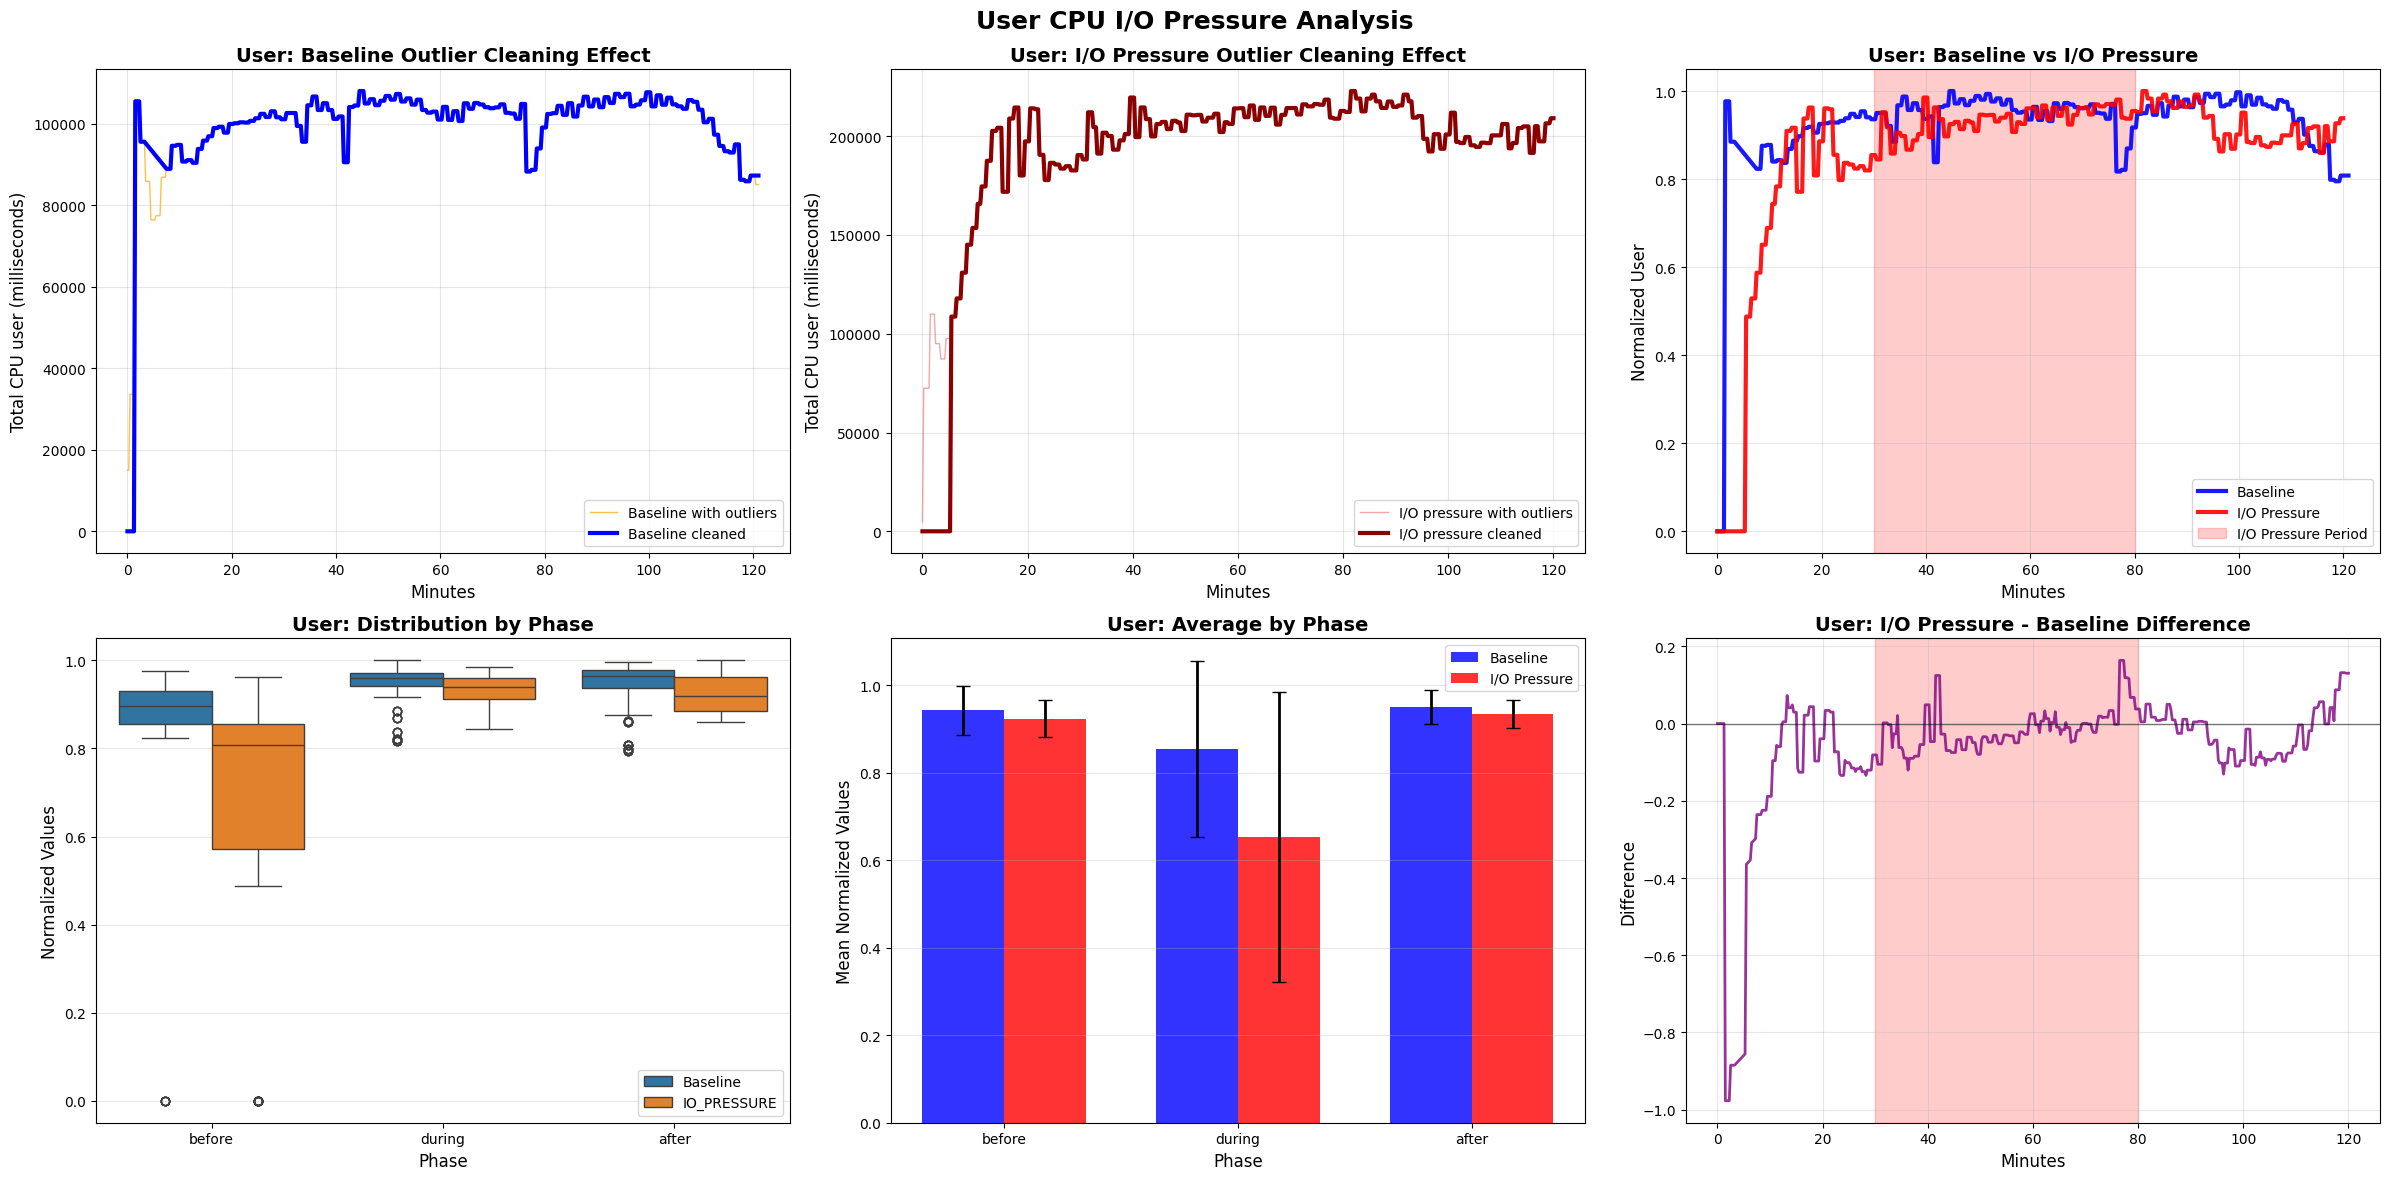


USER - CPU I/O PRESSURE ANALYSIS RESULTS

BASELINE STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.9421  0.0564  0.7950  0.9971
before  0.8533  0.2008  0.0000  0.9767
during  0.9502  0.0397  0.8171  1.0000

I/O PRESSURE STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.9237  0.0418  0.8595  1.0000
before  0.6539  0.3314  0.0000  0.9625
during  0.9335  0.0320  0.8446  0.9852

STATISTICAL SIGNIFICANCE TESTS:
  BEFORE  : t=  5.64, p=  0.0000 SIGNIFICANT
  DURING  : t=  4.65, p=  0.0000 SIGNIFICANT
  AFTER   : t=  3.35, p=  0.0009 SIGNIFICANT

I/O PRESSURE IMPACT ON CPU:
  BEFORE  :  -23.36% DECREASE
  DURING  :   -1.76% DECREASE
  AFTER   :   -1.96% DECREASE


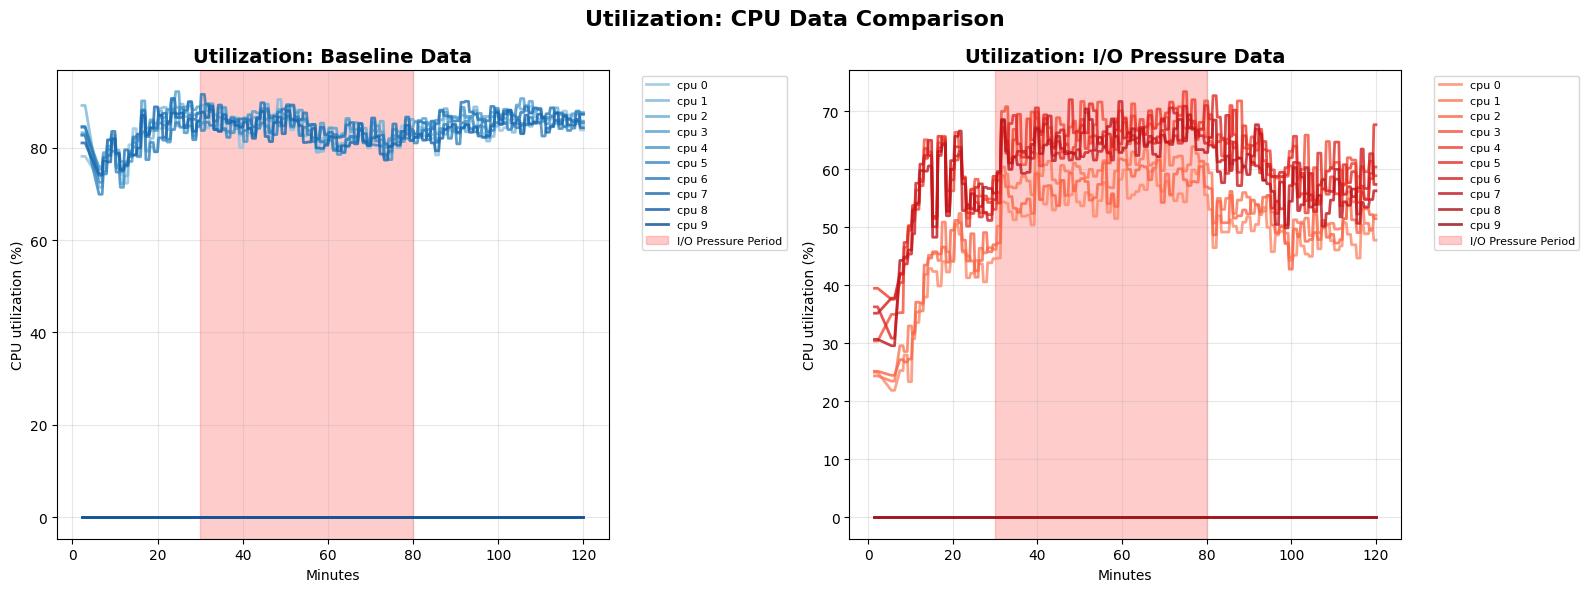

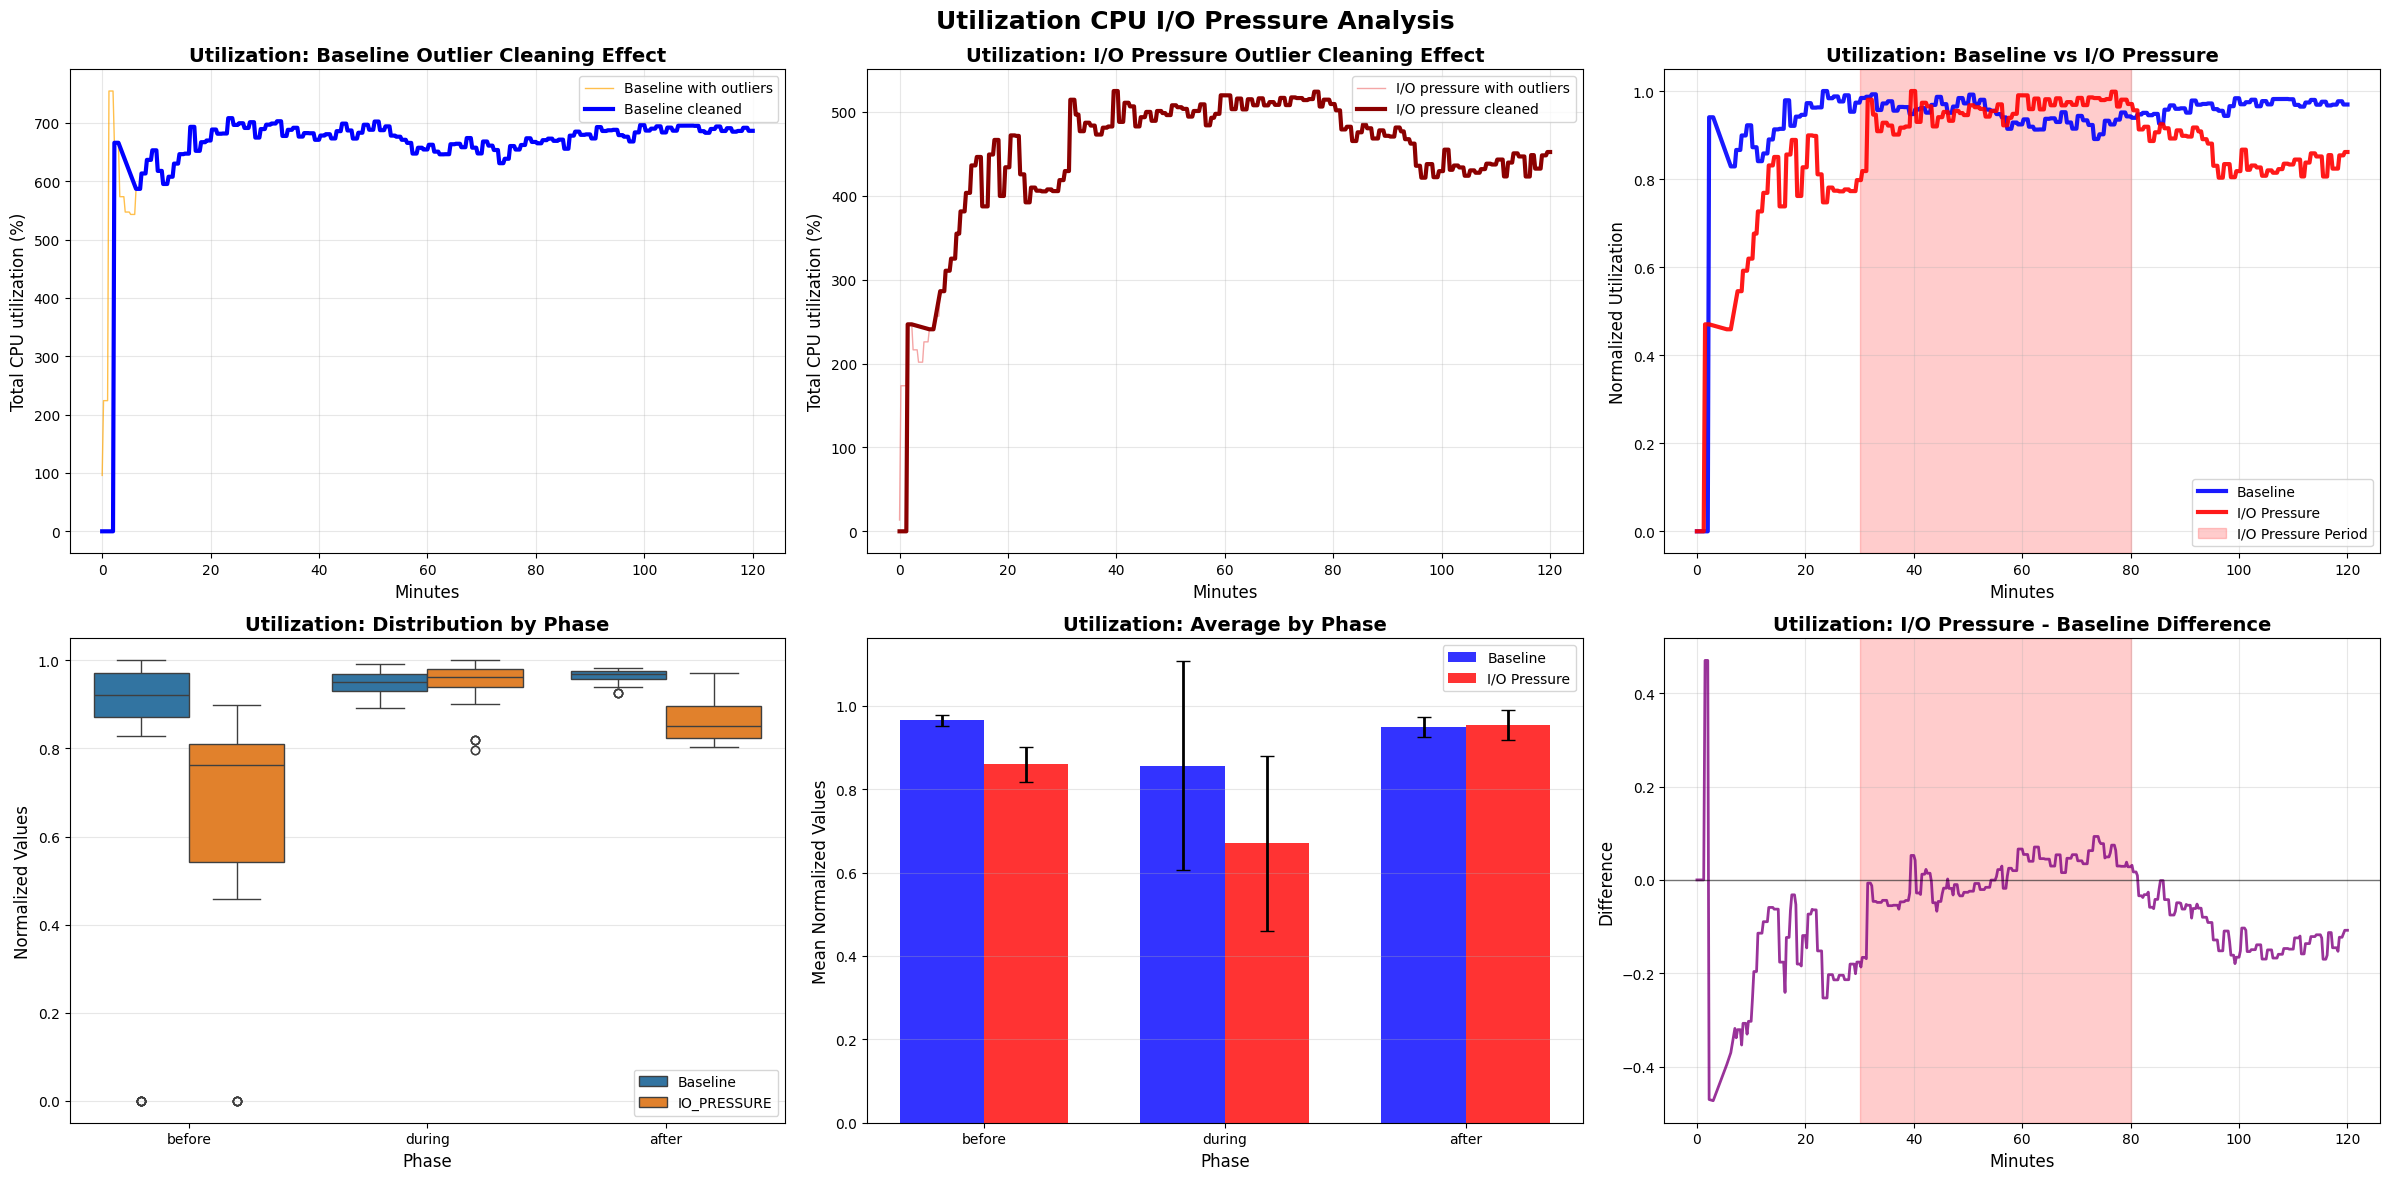


UTILIZATION - CPU I/O PRESSURE ANALYSIS RESULTS

BASELINE STATISTICS BY PHASE:
          mean     std    min     max
phase                                
after   0.9656  0.0134  0.926  0.9836
before  0.8568  0.2496  0.000  1.0000
during  0.9488  0.0247  0.891  0.9925

I/O PRESSURE STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.8597  0.0421  0.8032  0.9705
before  0.6706  0.2101  0.0000  0.8992
during  0.9543  0.0353  0.7976  1.0000

STATISTICAL SIGNIFICANCE TESTS:
  BEFORE  : t=  6.25, p=  0.0000 SIGNIFICANT
  DURING  : t= -1.80, p=  0.0722 NOT SIGNIFICANT
  AFTER   : t= 30.30, p=  0.0000 SIGNIFICANT

I/O PRESSURE IMPACT ON CPU:
  BEFORE  :  -21.73% DECREASE
  DURING  :   +0.58% INCREASE
  AFTER   :  -10.97% DECREASE


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as scipy_stats
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Load all datasets
df_iowait = pd.read_csv("cpu_iowait.csv")
df_cpu_irq = pd.read_csv("cpu_irq.csv")
df_system_msec = pd.read_csv("cpu_system_msec.csv")
df_user_msec = pd.read_csv("cpu_user_msec.csv")
df_cpu_util = pd.read_csv("cpu_util_per.csv")

df_baseline_iowait = pd.read_csv("../../baseline/cpu related/cpu_iowait.csv")
df_baseline_irq = pd.read_csv("../../baseline/cpu related/cpu_irq.csv")
df_baseline_system_msec = pd.read_csv("../../baseline/cpu related/cpu_system_msec.csv")
df_baseline_user_msec = pd.read_csv("../../baseline/cpu related/cpu_user_msec.csv")
df_baseline_util_per = pd.read_csv("../../baseline/cpu related/cpu_util_per.csv")

# Add source labels
df_iowait["source"] = "IO_PRESSURE"
df_cpu_irq["source"] = "IO_PRESSURE"
df_system_msec["source"] = "IO_PRESSURE"
df_user_msec["source"] = "IO_PRESSURE"
df_cpu_util["source"] = "IO_PRESSURE"

df_baseline_iowait["source"] = "BASELINE"
df_baseline_irq["source"] = "BASELINE"
df_baseline_system_msec["source"] = "BASELINE"
df_baseline_user_msec["source"] = "BASELINE"
df_baseline_util_per["source"] = "BASELINE"

# Convert to datetime
df_iowait["Time"] = pd.to_datetime(df_iowait["Time"])
df_cpu_irq["Time"] = pd.to_datetime(df_cpu_irq["Time"])
df_system_msec["Time"] = pd.to_datetime(df_system_msec["Time"])
df_user_msec["Time"] = pd.to_datetime(df_user_msec["Time"])
df_cpu_util["Time"] = pd.to_datetime(df_cpu_util["Time"])

df_baseline_iowait["Time"] = pd.to_datetime(df_baseline_iowait["Time"])
df_baseline_irq["Time"] = pd.to_datetime(df_baseline_irq["Time"])
df_baseline_system_msec["Time"] = pd.to_datetime(df_baseline_system_msec["Time"]) 
df_baseline_user_msec["Time"] = pd.to_datetime(df_baseline_user_msec["Time"])
df_baseline_util_per["Time"] = pd.to_datetime(df_baseline_util_per["Time"])

delay = 30
duration = 50

# Synchronize test datasets with baseline timeline
time_offset = df_baseline_iowait["Time"].min() - df_iowait["Time"].min()
df_iowait["Time"] += time_offset
df_cpu_irq["Time"] += time_offset
df_system_msec["Time"] += time_offset
df_user_msec["Time"] += time_offset
df_cpu_util["Time"] += time_offset

# Convert timeline to minutes 
all_dfs = [
    df_iowait, df_cpu_irq, df_system_msec, df_user_msec, df_cpu_util,
    df_baseline_iowait, df_baseline_irq, df_baseline_system_msec, 
    df_baseline_user_msec, df_baseline_util_per
]

for df in all_dfs:
    df["Minutes"] = (df["Time"] - df["Time"].min()).dt.total_seconds() / 60

# Original datasets dictionary 
original_datasets = {
    'IOWait': {'iopressure': df_iowait, 'baseline': df_baseline_iowait},
    'IRQ': {'iopressure': df_cpu_irq, 'baseline': df_baseline_irq},
    'System': {'iopressure': df_system_msec, 'baseline': df_baseline_system_msec},
    'User': {'iopressure': df_user_msec, 'baseline': df_baseline_user_msec},
    'Utilization': {'iopressure': df_cpu_util, 'baseline': df_baseline_util_per}
}

# Get appropriate y-axis label based on dataset type
def get_y_label(dataset_name):
    if dataset_name.lower() in ['user', 'system', 'iowait', 'irq']:
        return f'CPU {dataset_name.lower()} (milliseconds)'
    elif dataset_name.lower() == 'utilization':
        return 'CPU utilization (%)'
    else:
        return 'Value'

# Isolation Forest outlier detection
def remove_outliers_isolation_forest_cpu(df, contamination=0.02):
    df_clean = df.copy()
    cpu_cols = [col for col in df.columns if col.startswith('cpu')]
    outlier_stats = {}
    
    if len(cpu_cols) == 0:
        outlier_stats['_summary'] = {
            'total_outliers': 0,
            'contamination_rate': contamination,
            'features_used': 0,
            'percentage_removed': 0
        }
        return df_clean, outlier_stats
    
    feature_matrix = df[cpu_cols].values
    
    # Handle missing values
    if np.isnan(feature_matrix).any():
        feature_matrix = pd.DataFrame(feature_matrix).fillna(method='ffill').fillna(method='bfill').values
    
    # Check if there's enough variance to detect outliers
    if np.std(feature_matrix.flatten()) > 1e-10:
        # Scale features for better performance
        scaler = StandardScaler()
        feature_matrix_scaled = scaler.fit_transform(feature_matrix)
        
        # Initialize and fit Isolation Forest
        iso_forest = IsolationForest(
            contamination=contamination,
            n_estimators=100,
            random_state=42,
            n_jobs=-1
        )
        
        iso_forest.fit(feature_matrix_scaled)
        outlier_predictions = iso_forest.predict(feature_matrix_scaled)
        
        outlier_mask = outlier_predictions == -1
        
        # Apply outlier removal to each CPU column
        for col in cpu_cols:
            outlier_stats[col] = {
                'count': outlier_mask.sum(),
                'percentage': (outlier_mask.sum() / len(df[col])) * 100,
                'method': 'isolation_forest'
            }
            
            # Set outliers to NaN and interpolate
            df_clean.loc[outlier_mask, col] = np.nan
            df_clean[col] = df_clean[col].interpolate(method='linear')
        
        outlier_stats['_summary'] = {
            'total_outliers': outlier_mask.sum(),
            'contamination_rate': contamination,
            'features_used': len(cpu_cols),
            'percentage_removed': (outlier_mask.sum() / len(df)) * 100
        }
    else:
        for col in cpu_cols:
            outlier_stats[col] = {
                'count': 0,
                'percentage': 0,
                'method': 'isolation_forest'
            }
        
        outlier_stats['_summary'] = {
            'total_outliers': 0,
            'contamination_rate': contamination,
            'features_used': len(cpu_cols),
            'percentage_removed': 0
        }
    
    return df_clean, outlier_stats

# Apply outlier cleaning
datasets_clean = {}
all_outlier_stats = {}

for dataset_name, dataset_pair in original_datasets.items():
    datasets_clean[dataset_name] = {}
    all_outlier_stats[dataset_name] = {}
    
    for source_type, df in dataset_pair.items():
        df_clean, stats = remove_outliers_isolation_forest_cpu(df, contamination=0.05)
        datasets_clean[dataset_name][source_type] = df_clean
        all_outlier_stats[dataset_name][source_type] = stats

# Normalization function
def normalize_df_cpu(df, columns):
    result = df.copy()
    for col in columns:
        min_val = df[col].min()
        max_val = df[col].max()
        if max_val > min_val:  
            result[col] = (df[col] - min_val) / (max_val - min_val)
        else:
            result[col] = 0
    return result

# Add phase column
def add_phase_column(df, delay_minutes, duration_minutes):
    df = df.copy()
    df['phase'] = 'before'  
    df.loc[(df['Minutes'] >= delay_minutes) & (df['Minutes'] <= delay_minutes + duration_minutes), 'phase'] = 'during'  
    df.loc[df['Minutes'] > delay_minutes + duration_minutes, 'phase'] = 'after' 
    return df

# Plot original CPU data
def plot_original_cpu_data(dataset_name, iopressure_df, baseline_df, delay_minutes, duration_minutes):
    cpu_cols = [col for col in iopressure_df.columns if col.startswith('cpu')]
    
    if len(cpu_cols) == 0:
        return
    
    # Show all columns
    display_cols = cpu_cols
    
    # Get appropriate y-axis label
    y_label = get_y_label(dataset_name)
    
    # Create 2 subplots side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Plot 1: Baseline Data
    colors_baseline = plt.cm.Blues(np.linspace(0.4, 0.9, len(display_cols)))
    for i, cpu_col in enumerate(display_cols):
        ax1.plot(baseline_df['Minutes'], baseline_df[cpu_col], 
                color=colors_baseline[i], linewidth=2, alpha=0.8, 
                label=cpu_col)
    
    ax1.axvspan(delay_minutes, delay_minutes + duration_minutes, 
                color='red', alpha=0.2, label="I/O Pressure Period")
    ax1.set_title(f'{dataset_name}: Baseline Data', fontweight='bold', fontsize=14)
    ax1.set_xlabel('Minutes')
    ax1.set_ylabel(y_label)
    ax1.grid(True, alpha=0.3)
    ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
    
    # Plot 2: I/O Pressure Data
    colors_stress = plt.cm.Reds(np.linspace(0.4, 0.9, len(display_cols)))
    for i, cpu_col in enumerate(display_cols):
        ax2.plot(iopressure_df['Minutes'], iopressure_df[cpu_col], 
                color=colors_stress[i], linewidth=2, alpha=0.8, 
                label=cpu_col)
    
    ax2.axvspan(delay_minutes, delay_minutes + duration_minutes, 
                color='red', alpha=0.2, label="I/O Pressure Period")
    ax2.set_title(f'{dataset_name}: I/O Pressure Data', fontweight='bold', fontsize=14)
    ax2.set_xlabel('Minutes')
    ax2.set_ylabel(y_label)
    ax2.grid(True, alpha=0.3)
    ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
    
    plt.suptitle(f'{dataset_name}: CPU Data Comparison', 
                fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

# Enhanced analysis and plot function
def analyze_and_plot_cpu_dataset_wide(dataset_name, iopressure_df_clean, baseline_df_clean, delay_minutes, duration_minutes):
    cpu_cols = [col for col in iopressure_df_clean.columns if col.startswith('cpu')]
    
    plot_original_cpu_data(dataset_name, iopressure_df_clean, baseline_df_clean, delay_minutes, duration_minutes)
    
    # Get original datasets for comparison
    iopressure_df_original = original_datasets[dataset_name]['iopressure']
    baseline_df_original = original_datasets[dataset_name]['baseline']
    
    iopressure_norm = normalize_df_cpu(iopressure_df_clean, cpu_cols)
    baseline_norm = normalize_df_cpu(baseline_df_clean, cpu_cols)
    
    # Calculate cumulative metrics
    iopressure_df_clean['Total'] = iopressure_df_clean[cpu_cols].sum(axis=1)
    baseline_df_clean['Total'] = baseline_df_clean[cpu_cols].sum(axis=1)
    
    # Normalize totals
    iopressure_norm['Total'] = (iopressure_df_clean['Total'] - iopressure_df_clean['Total'].min()) / (iopressure_df_clean['Total'].max() - iopressure_df_clean['Total'].min())
    baseline_norm['Total'] = (baseline_df_clean['Total'] - baseline_df_clean['Total'].min()) / (baseline_df_clean['Total'].max() - baseline_df_clean['Total'].min())
    
    # Add phase information
    iopressure_norm = add_phase_column(iopressure_norm, delay_minutes, duration_minutes)
    baseline_norm = add_phase_column(baseline_norm, delay_minutes, duration_minutes)
    
    # Statistical analysis
    stats_baseline = baseline_norm.groupby('phase')['Total'].agg(['mean', 'std', 'min', 'max'])
    stats_iopressure = iopressure_norm.groupby('phase')['Total'].agg(['mean', 'std', 'min', 'max'])
    
    # Combined dataframe for analysis
    df_combined = pd.DataFrame({
        'Baseline': baseline_norm['Total'],
        'IO_PRESSURE': iopressure_norm['Total'],
        'Minutes': baseline_norm['Minutes'],
        'phase': baseline_norm['phase'],
        'difference': iopressure_norm['Total'] - baseline_norm['Total']
    })
    
    # T-tests for statistical significance
    t_tests = {}
    for phase in ['before', 'during', 'after']:
        data = df_combined[df_combined['phase'] == phase]
        t_stat, p_value = scipy_stats.ttest_ind(data['Baseline'].dropna(), data['IO_PRESSURE'].dropna())
        t_tests[phase] = {'t': t_stat, 'p': p_value}
    
    # Calculate percentage impact
    impact = {}
    for phase in ['before', 'during', 'after']:
        baseline_mean = stats_baseline.loc[phase, 'mean']
        iopressure_mean = stats_iopressure.loc[phase, 'mean']
        impact[phase] = ((iopressure_mean - baseline_mean) / baseline_mean) * 100 if baseline_mean != 0 else float('inf')
    
    # Get appropriate y-axis label
    y_label = get_y_label(dataset_name)
    
    # Comprehensive analysis plotting
    fig = plt.figure(figsize=(24, 12))
    
    # 1. Baseline outlier cleaning effect
    plt.subplot(2, 3, 1)
    plt.plot(baseline_df_original['Minutes'], baseline_df_original[cpu_cols].sum(axis=1), 
             label='Baseline with outliers', color='orange', alpha=0.7, linewidth=1)
    plt.plot(baseline_df_clean['Minutes'], baseline_df_clean['Total'], 
             label='Baseline cleaned', linewidth=3, color='blue')
    plt.title(f'{dataset_name}: Baseline Outlier Cleaning Effect', fontsize=14, fontweight='bold')
    plt.xlabel('Minutes', fontsize=12)
    plt.ylabel(f'Total {y_label}', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)
    
    # 2. I/O pressure outlier cleaning effect
    plt.subplot(2, 3, 2)
    plt.plot(iopressure_df_original['Minutes'], iopressure_df_original[cpu_cols].sum(axis=1), 
             label='I/O pressure with outliers', alpha=0.7, color='lightcoral', linewidth=1)
    plt.plot(iopressure_df_clean['Minutes'], iopressure_df_clean['Total'], 
             label='I/O pressure cleaned', linewidth=3, color='darkred')
    plt.title(f'{dataset_name}: I/O Pressure Outlier Cleaning Effect', fontsize=14, fontweight='bold')
    plt.xlabel('Minutes', fontsize=12)
    plt.ylabel(f'Total {y_label}', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)
    
    # 3. Timeline comparison
    plt.subplot(2, 3, 3)
    plt.plot(baseline_norm['Minutes'], baseline_norm['Total'], 
             label='Baseline', linewidth=3, color='blue', alpha=0.9)
    plt.plot(iopressure_norm['Minutes'], iopressure_norm['Total'], 
             label='I/O Pressure', linewidth=3, color='red', alpha=0.9)
    plt.axvspan(delay_minutes, delay_minutes + duration_minutes, 
                color='red', alpha=0.2, label="I/O Pressure Period")
    plt.title(f"{dataset_name}: Baseline vs I/O Pressure", fontsize=14, fontweight='bold')
    plt.xlabel("Minutes", fontsize=12)
    plt.ylabel(f"Normalized {dataset_name}", fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=10)
    
    # 4. Box plot by phase
    plt.subplot(2, 3, 4)
    box_data = pd.melt(df_combined[['Baseline', 'IO_PRESSURE', 'phase']], 
                      id_vars=['phase'], var_name='source', value_name='value')
    sns.boxplot(x='phase', y='value', hue='source', data=box_data, ax=plt.gca())
    plt.title(f'{dataset_name}: Distribution by Phase', fontsize=14, fontweight='bold')
    plt.xlabel('Phase', fontsize=12)
    plt.ylabel('Normalized Values', fontsize=12)
    plt.grid(axis='y', alpha=0.3)
    plt.legend(fontsize=10)
    
    # 5. Statistics by phase
    plt.subplot(2, 3, 5)
    phases = ['before', 'during', 'after']
    x = np.arange(len(phases))
    width = 0.35
    
    bars1 = plt.bar(x - width/2, stats_baseline['mean'], width, label='Baseline', alpha=0.8, color='blue')
    bars2 = plt.bar(x + width/2, stats_iopressure['mean'], width, label='I/O Pressure', alpha=0.8, color='red')
    
    plt.errorbar(x - width/2, stats_baseline['mean'], yerr=stats_baseline['std'], 
                fmt='none', ecolor='black', capsize=5, linewidth=2)
    plt.errorbar(x + width/2, stats_iopressure['mean'], yerr=stats_iopressure['std'], 
                fmt='none', ecolor='black', capsize=5, linewidth=2)
    
    plt.title(f'{dataset_name}: Average by Phase', fontsize=14, fontweight='bold')
    plt.xlabel('Phase', fontsize=12)
    plt.ylabel('Mean Normalized Values', fontsize=12)
    plt.xticks(x, phases)
    plt.legend(fontsize=10)
    plt.grid(axis='y', alpha=0.3)
    
    # 6. Difference over time
    plt.subplot(2, 3, 6)
    plt.plot(df_combined['Minutes'], df_combined['difference'], 
             color='purple', linewidth=2, alpha=0.8)
    plt.axhline(y=0, color='black', linestyle='-', alpha=0.5, linewidth=1)
    plt.axvspan(delay_minutes, delay_minutes + duration_minutes, 
                color='red', alpha=0.2)
    plt.title(f'{dataset_name}: I/O Pressure - Baseline Difference', fontsize=14, fontweight='bold')
    plt.xlabel('Minutes', fontsize=12)
    plt.ylabel('Difference', fontsize=12)
    plt.grid(True, alpha=0.3)
    
    plt.suptitle(f'{dataset_name} CPU I/O Pressure Analysis', 
                fontsize=18, fontweight='bold', y=0.98)
    plt.tight_layout()
    plt.subplots_adjust(top=0.93)
    plt.show()
    
    # Print statistical results
    print(f"\n{dataset_name.upper()} - CPU I/O PRESSURE ANALYSIS RESULTS")
    print(f"{'='*80}")
    
    print(f"\nBASELINE STATISTICS BY PHASE:")
    print(stats_baseline.round(4))
    
    print(f"\nI/O PRESSURE STATISTICS BY PHASE:")
    print(stats_iopressure.round(4))
    
    print(f"\nSTATISTICAL SIGNIFICANCE TESTS:")
    for phase, test in t_tests.items():
        sig = "SIGNIFICANT" if test['p'] < 0.05 else "NOT SIGNIFICANT"
        print(f"  {phase.upper():8}: t={test['t']:6.2f}, p={test['p']:8.4f} {sig}")
    
    print(f"\nI/O PRESSURE IMPACT ON CPU:")
    for phase, change in impact.items():
        direction = "INCREASE" if change > 0 else "DECREASE" if change < 0 else "NO CHANGE"
        print(f"  {phase.upper():8}: {change:+7.2f}% {direction}")
    
    return {
        'stats_baseline': stats_baseline,
        'stats_iopressure': stats_iopressure,
        't_tests': t_tests,
        'impact': impact,
        'combined_data': df_combined,
        'cpu_columns': cpu_cols
    }

# Run analysis 
analysis_results = {}

for dataset_name in datasets_clean.keys():
    iopressure_clean = datasets_clean[dataset_name]['iopressure']
    baseline_clean = datasets_clean[dataset_name]['baseline']
    
    analysis_results[dataset_name] = analyze_and_plot_cpu_dataset_wide(
        dataset_name, 
        iopressure_clean, 
        baseline_clean, 
        delay, 
        duration
    )